<a href="https://colab.research.google.com/github/DeepakSahooPro/Order-Delivery-Analysis/blob/main/Blinkit_Inventory_and_Sply_chain_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
orders = pd.read_csv('Orders.csv')
orders

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463
...,...,...,...,...,...,...,...,...,...,...
9995,12996,15996,2025-02-06 17:44:03.428463,1035,1,90,2036,Delivered,2025-02-06 17:54:03.428463,2025-02-06 17:59:03.428463
9996,12997,15997,2025-02-08 20:34:03.428463,1043,4,560,2035,Delivered,2025-02-08 20:44:03.428463,2025-02-08 20:54:03.428463
9997,12998,15998,2025-02-08 06:43:03.428463,1017,4,960,2085,Delivered,2025-02-08 06:53:03.428463,2025-02-08 06:55:03.428463
9998,12999,15999,2025-02-15 05:58:03.428463,1039,4,440,2046,Delivered,2025-02-15 06:08:03.428463,2025-02-15 06:08:03.428463


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   OrderID               10000 non-null  int64 
 1   CustomerID            10000 non-null  int64 
 2   OrderDateTime         10000 non-null  object
 3   ProductID             10000 non-null  int64 
 4   Quantity              10000 non-null  int64 
 5   TotalAmount           10000 non-null  int64 
 6   StoreID               10000 non-null  int64 
 7   OrderStatus           10000 non-null  object
 8   ExpectedDeliveryTime  10000 non-null  object
 9   ActualDeliveryTime    10000 non-null  object
dtypes: int64(6), object(4)
memory usage: 781.4+ KB


In [7]:
#fixing data and time datatypes
orders["OrderDateTime"]=pd.to_datetime(orders["OrderDateTime"])
orders["ExpectedDeliveryTime"]=pd.to_datetime(orders["ExpectedDeliveryTime"])
orders["ActualDeliveryTime"]=pd.to_datetime(orders["ActualDeliveryTime"])

In [8]:
#finding actual delivery in mins
orders["Actual_Delivery_in_mins"] =(orders["ActualDeliveryTime"]-orders["OrderDateTime"]).dt.total_seconds()/60
orders

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Actual_Delivery_in_mins
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,25.0
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,12.0
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,12.0
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,25.0
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,25.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,12996,15996,2025-02-06 17:44:03.428463,1035,1,90,2036,Delivered,2025-02-06 17:54:03.428463,2025-02-06 17:59:03.428463,15.0
9996,12997,15997,2025-02-08 20:34:03.428463,1043,4,560,2035,Delivered,2025-02-08 20:44:03.428463,2025-02-08 20:54:03.428463,20.0
9997,12998,15998,2025-02-08 06:43:03.428463,1017,4,960,2085,Delivered,2025-02-08 06:53:03.428463,2025-02-08 06:55:03.428463,12.0
9998,12999,15999,2025-02-15 05:58:03.428463,1039,4,440,2046,Delivered,2025-02-15 06:08:03.428463,2025-02-15 06:08:03.428463,10.0


In [10]:
orders["Expected_delivery_in_mins"] =(orders["ExpectedDeliveryTime"] - orders["OrderDateTime"]).dt.total_seconds()/60
orders

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Actual_Delivery_in_mins,Expected_delivery_in_mins
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,25.0,10.0
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,12.0,10.0
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,12.0,10.0
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,25.0,10.0
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12996,15996,2025-02-06 17:44:03.428463,1035,1,90,2036,Delivered,2025-02-06 17:54:03.428463,2025-02-06 17:59:03.428463,15.0,10.0
9996,12997,15997,2025-02-08 20:34:03.428463,1043,4,560,2035,Delivered,2025-02-08 20:44:03.428463,2025-02-08 20:54:03.428463,20.0,10.0
9997,12998,15998,2025-02-08 06:43:03.428463,1017,4,960,2085,Delivered,2025-02-08 06:53:03.428463,2025-02-08 06:55:03.428463,12.0,10.0
9998,12999,15999,2025-02-15 05:58:03.428463,1039,4,440,2046,Delivered,2025-02-15 06:08:03.428463,2025-02-15 06:08:03.428463,10.0,10.0


In [11]:
#to see distinct values in a column
orders["OrderStatus"].unique()

array(['Delivered'], dtype=object)

In [12]:
#to see distinct values in a column
orders["StoreID"].unique()

array([2051, 2084, 2008, 2071, 2045, 2056, 2081, 2075, 2020, 2005, 2025,
       2090, 2062, 2007, 2097, 2006, 2088, 2077, 2011, 2010, 2028, 2068,
       2064, 2041, 2089, 2059, 2026, 2095, 2022, 2027, 2078, 2067, 2023,
       2092, 2085, 2019, 2049, 2065, 2003, 2009, 2094, 2018, 2061, 2066,
       2046, 2054, 2079, 2057, 2073, 2001, 2083, 2060, 2039, 2052, 2042,
       2091, 2096, 2047, 2080, 2035, 2015, 2050, 2076, 2053, 2074, 2063,
       2031, 2087, 2036, 2021, 2058, 2032, 2033, 2013, 2017, 2016, 2099,
       2012, 2000, 2037, 2002, 2040, 2048, 2082, 2072, 2034, 2098, 2029,
       2093, 2024, 2030, 2086, 2043, 2044, 2055, 2070, 2069, 2004, 2014,
       2038])

In [15]:
orders["diff_bw_expected_and_actual"] =  orders["Expected_delivery_in_mins"]-orders["Actual_Delivery_in_mins"]
orders

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Actual_Delivery_in_mins,Expected_delivery_in_mins,diff_bw_expected_and_actual
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,25.0,10.0,-15.0
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,12.0,10.0,-2.0
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,12.0,10.0,-2.0
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,25.0,10.0,-15.0
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,25.0,10.0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12996,15996,2025-02-06 17:44:03.428463,1035,1,90,2036,Delivered,2025-02-06 17:54:03.428463,2025-02-06 17:59:03.428463,15.0,10.0,-5.0
9996,12997,15997,2025-02-08 20:34:03.428463,1043,4,560,2035,Delivered,2025-02-08 20:44:03.428463,2025-02-08 20:54:03.428463,20.0,10.0,-10.0
9997,12998,15998,2025-02-08 06:43:03.428463,1017,4,960,2085,Delivered,2025-02-08 06:53:03.428463,2025-02-08 06:55:03.428463,12.0,10.0,-2.0
9998,12999,15999,2025-02-15 05:58:03.428463,1039,4,440,2046,Delivered,2025-02-15 06:08:03.428463,2025-02-15 06:08:03.428463,10.0,10.0,0.0


In [21]:
#Loc allows us to work with indexes
orders.loc[(orders["diff_bw_expected_and_actual"] ==0),"order_status"] = "On Time"
orders.loc[(orders["diff_bw_expected_and_actual"] <0),"order_status"] = "Delayed"
orders.loc[(orders["diff_bw_expected_and_actual"] >0),"order_status"] = "Early"
orders

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Actual_Delivery_in_mins,Expected_delivery_in_mins,diff_bw_expected_and_actual,order_status
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,25.0,10.0,-15.0,Delayed
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,12.0,10.0,-2.0,Delayed
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,12.0,10.0,-2.0,Delayed
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,25.0,10.0,-15.0,Delayed
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,25.0,10.0,-15.0,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12996,15996,2025-02-06 17:44:03.428463,1035,1,90,2036,Delivered,2025-02-06 17:54:03.428463,2025-02-06 17:59:03.428463,15.0,10.0,-5.0,Delayed
9996,12997,15997,2025-02-08 20:34:03.428463,1043,4,560,2035,Delivered,2025-02-08 20:44:03.428463,2025-02-08 20:54:03.428463,20.0,10.0,-10.0,Delayed
9997,12998,15998,2025-02-08 06:43:03.428463,1017,4,960,2085,Delivered,2025-02-08 06:53:03.428463,2025-02-08 06:55:03.428463,12.0,10.0,-2.0,Delayed
9998,12999,15999,2025-02-15 05:58:03.428463,1039,4,440,2046,On Time,2025-02-15 06:08:03.428463,2025-02-15 06:08:03.428463,10.0,10.0,0.0,On Time


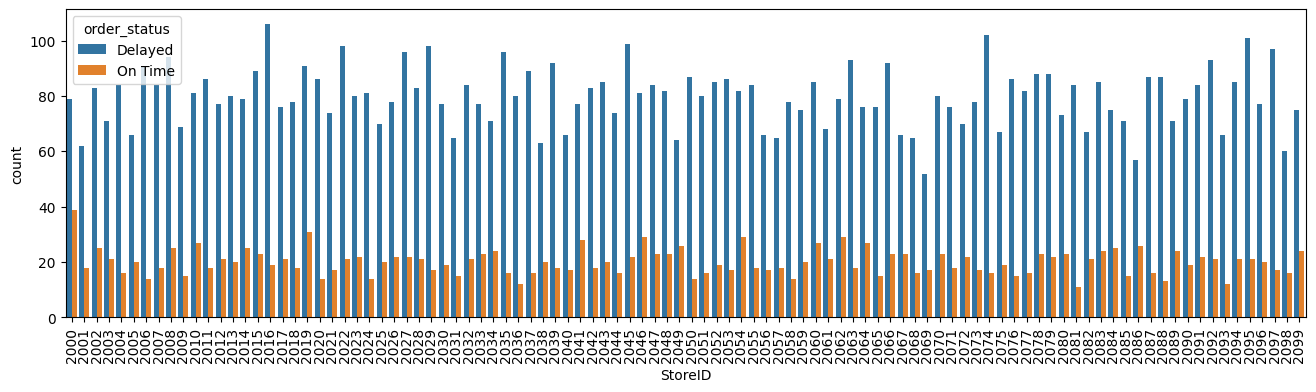

In [22]:
plt.figure(figsize=(16,4))
sns.countplot(x="StoreID",data=orders,hue ="order_status")
plt.xticks(rotation=90)
plt.show()

In [23]:
products = pd.read_csv('Products.csv')
products.head()

,ProductID,ProductName,Category,Brand,PricePerUnit,StockQuantity
0,1000,Amul Taaza Milk 1L,Dairy,Amul,72,564
1,1001,Amul Butter 500g,Dairy,Amul,260,409
2,1002,Mother Dairy Curd 400g,Dairy,Mother Dairy,40,485
3,1003,Aashirvaad Atta 5kg,Grocery,Aashirvaad,255,236
4,1004,Tata Salt 1kg,Grocery,Tata,28,539


In [24]:
orders.head()

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Actual_Delivery_in_mins,Expected_delivery_in_mins,diff_bw_expected_and_actual,order_status
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,25.0,10.0,-15.0,Delayed
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,12.0,10.0,-2.0,Delayed
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,12.0,10.0,-2.0,Delayed
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,25.0,10.0,-15.0,Delayed
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,25.0,10.0,-15.0,Delayed


In [25]:
df= pd.merge(left =orders,right=products,on="ProductID",how="left")
df.head()

,OrderID,CustomerID,OrderDateTime,ProductID,Quantity,TotalAmount,StoreID,OrderStatus,ExpectedDeliveryTime,ActualDeliveryTime,Actual_Delivery_in_mins,Expected_delivery_in_mins,diff_bw_expected_and_actual,order_status,ProductName,Category,Brand,PricePerUnit,StockQuantity
0,3001,6001,2025-01-22 20:02:03.428463,1025,2,90,2051,Delivered,2025-01-22 20:12:03.428463,2025-01-22 20:27:03.428463,25.0,10.0,-15.0,Delayed,Dove Soap 125g,Personal Care,Dove,45,759
1,3002,6002,2025-02-18 15:58:03.428463,1027,1,99,2084,Delivered,2025-02-18 16:08:03.428463,2025-02-18 16:10:03.428463,12.0,10.0,-2.0,Delayed,Real Mixed Fruit Juice 1L,Beverages,Real,99,286
2,3003,6003,2025-02-04 06:58:03.428463,1001,3,780,2008,Delivered,2025-02-04 07:08:03.428463,2025-02-04 07:10:03.428463,12.0,10.0,-2.0,Delayed,Amul Butter 500g,Dairy,Amul,260,409
3,3004,6004,2025-02-08 17:00:03.428463,1025,4,180,2008,Delivered,2025-02-08 17:10:03.428463,2025-02-08 17:25:03.428463,25.0,10.0,-15.0,Delayed,Dove Soap 125g,Personal Care,Dove,45,759
4,3005,6005,2025-02-06 18:43:03.428463,1023,3,405,2071,Delivered,2025-02-06 18:53:03.428463,2025-02-06 19:08:03.428463,25.0,10.0,-15.0,Delayed,Haldiram's Bhujia 400g,Snacks,Haldiram's,135,275


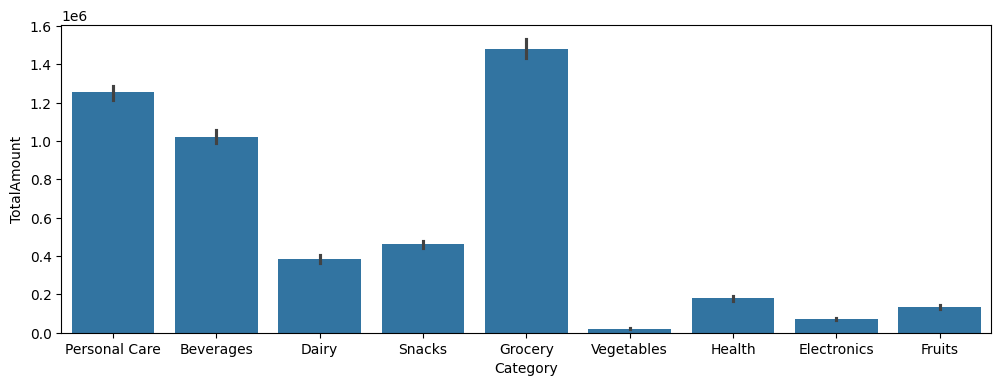

In [26]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['Category'],y=df['TotalAmount'],data=df,estimator="sum")

plt.show()